In [36]:
#  Libraries import
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load data
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Fill missing Age values with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Drop unwanted columns if they exist
cols_to_drop = ['Ticket', 'Cabin', 'Name', 'PassengerId']
existing_cols = [col for col in cols_to_drop if col in df.columns]
df.drop(existing_cols, axis=1, inplace=True)

# Convert Sex to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Fill missing Embarked values and encode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

# Prepare features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessing complete!")



Data preprocessing complete!


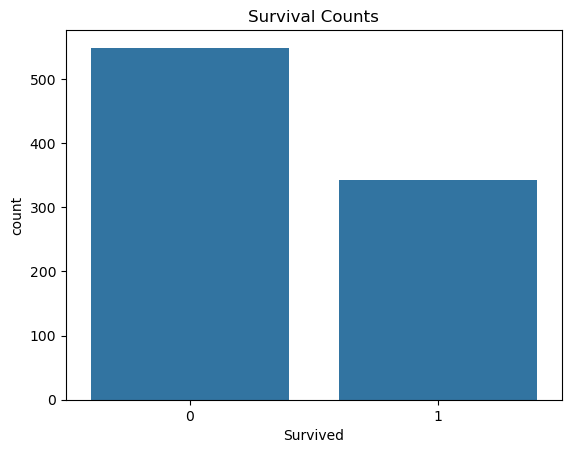

In [37]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Counts')
plt.show()





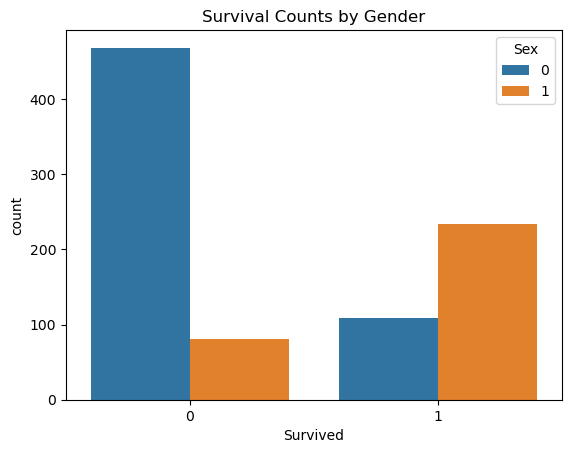

In [38]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Counts by Gender')
plt.show()

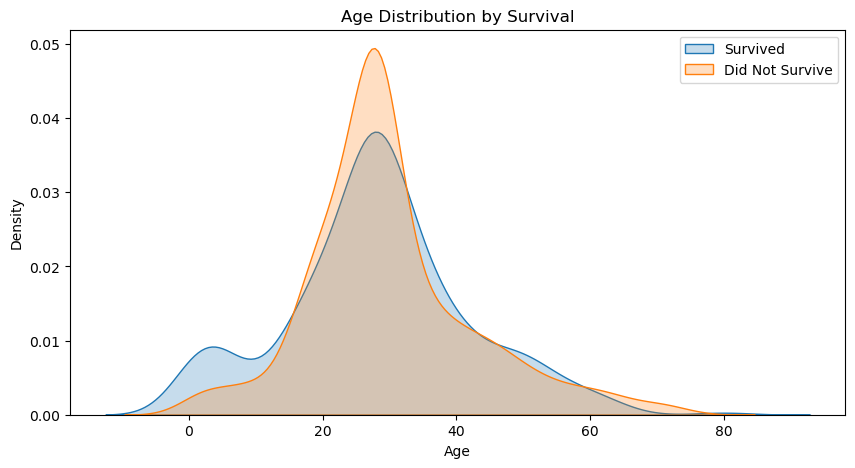

In [39]:
plt.figure(figsize=(10,5))
sns.kdeplot(df[df['Survived']==1]['Age'].dropna(), label='Survived', fill=True)
sns.kdeplot(df[df['Survived']==0]['Age'].dropna(), label='Did Not Survive', fill=True)
plt.title('Age Distribution by Survival')
plt.legend()
plt.show()

In [40]:
# Fill missing Age values with median (avoid inplace on column slice)
df['Age'] = df['Age'].fillna(df['Age'].median())

# Drop columns only if they exist
cols_to_drop = ['Ticket', 'Cabin', 'Name', 'PassengerId']
existing_cols = [col for col in cols_to_drop if col in df.columns]
df.drop(existing_cols, axis=1, inplace=True)

# Convert 'Sex' to numeric
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

# Fill Embarked missing values with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Convert Embarked to numeric
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])


In [41]:
X = df.drop('Survived', axis=1)  # features
y = df['Survived']               # target

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model 
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Model train
model.fit(X_train, y_train)

print("Model training complete!")


Model training complete!


In [43]:
from sklearn.metrics import accuracy_score

# Test data prediction 
y_pred = model.predict(X_test)

# Accuracy calculate 
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc*100:.2f}%')


Accuracy: 73.74%


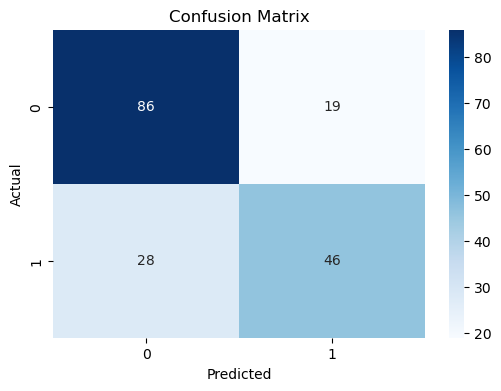

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix 
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
